# CRISP-DM

# Bussines Understanding

Segmentasi pelanggan adalah salah satu aspek penting yang harus dipertimbangkan dengan hati-hati oleh bisnis sebelum merumuskan produk atau layanan untuk basis pelanggannya. Menyampaikan pesan yang tepat kepada pelanggan yang tepat dan pada waktu yang tepat telah menjadi tujuan semua bank. 

Bank melihat segmentasi pelanggan untuk mendapatkan wawasan, tentang cara memutuskan penawaran tertentu, meningkatkan layanan pelanggan, dan memahami perilaku pelanggan & lainnya. Keberhasilan atau kegagalan kampanye pemasaran tergantung pada bagaimana pelanggan tersegmentasi. Berdasarkan segmentasi pelanggan, bank mengeluarkan rekomendasi produk seperti rencana tabungan, pinjaman, manajemen kekayaan, dll. pada kelompok pelanggan sasaran.

Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/sidharth178/customer-segmentation) bertujuan Untuk mensegmentasi dan menganalisis nasabah bank dengan menggunakan model Kmeans sehingga dapat memahami jenis nasabah yang dimiliki bank yang kemudian dapat digunakan dalam mengembangkan produk yang menguntungkan yang dapat menghasilkan lebih banyak pendapatan bagi bank. Ini adalah kumpulan data sampel kecil yang merangkum perilaku penggunaan sekitar hampir 1000 pemegang kartu kredit aktif selama 6 bulan terakhir. Unit untuk pendapatan dalam ribuan dolar.

# Data Understanding

Dari pengumpulan data yang telah diambil mengenai segmentasi pelanggan bank, terdapat 10 kolom yang berisi 4 kolom float64 dan 5 kolom integer. Jika menggunakan Algoritma KMeans, maka hanya kolom yang berisi int64 saja yang diolah. Berikut atribut-atribut nya :
     

 1.   Customer Id      int64     = id pelanggan

 2.   Age              int64     = umur pelanggan

 3.   Edu              int64     = Tingkat edukasi pelanggan

 4.   Years Employed   int64     = lama tahun bekerja

 5.   Income           int64     = pendapatan dalam ribuan dollars

 6.   Card Debt        float64   = hutang kartu kredit

 7.   Other Debt       float64   = utang lainnya

 8.   Defaulted        float64   = Kepatuhan terhadap kontrak/janji hutang

 9.   DebtIncomeRatio  float64   = rasio hutang pendapatan

 Dan atribut data yang diambil yaitu Years Employed dan Income

 

# import library yang di butuhkan

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

# membaca dataset

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


# persiapan dataset

In [5]:
X = df.drop(['Unnamed: 0','Customer Id','Edu','Card Debt','Other Debt','Defaulted','DebtIncomeRatio'], axis=1)

In [6]:
print(X)

     Age  Years Employed  Income
0     41               6      19
1     47              26     100
2     33              10      57
3     29               4      19
4     47              31     253
..   ...             ...     ...
845   27               5      26
846   28               7      34
847   25               0      18
848   32              12      28
849   52              16      64

[850 rows x 3 columns]


# menetukan jumlah cluster dengan elbow

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(4, 300000, 'Possible elbow point')

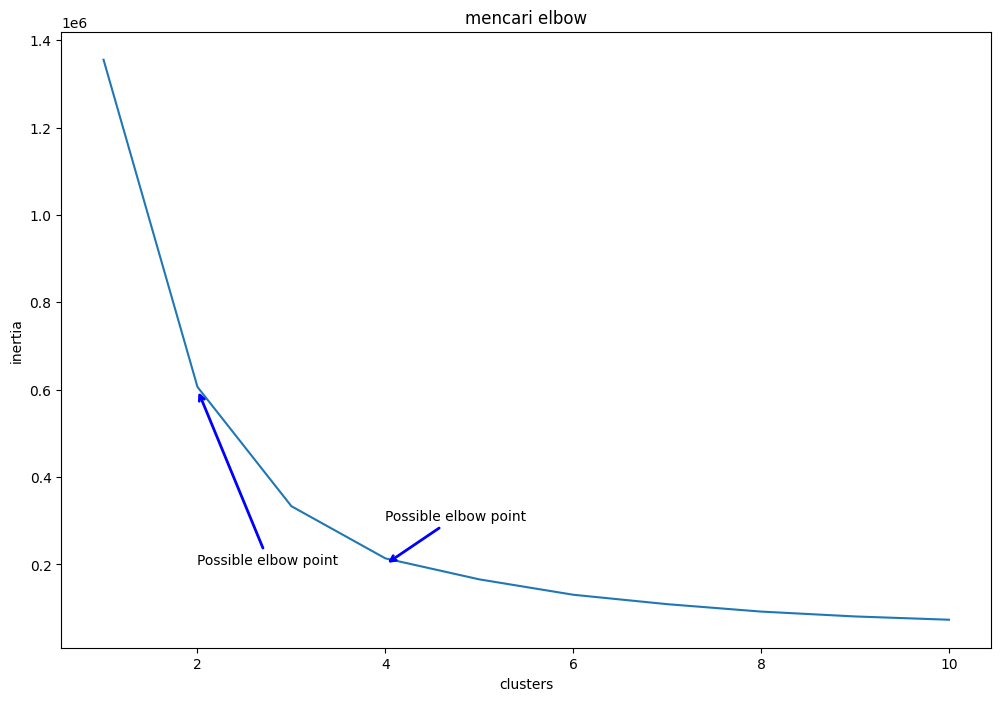

In [7]:
clusters=[]
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(2, 600000), xytext=(2, 200000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(4, 200000), xytext=(4, 300000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))




diketahui elbow berada di titik 2 hingga 4, disini saya memutuskan untuk membuat 3 cluster.

# proses clustering

In [8]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


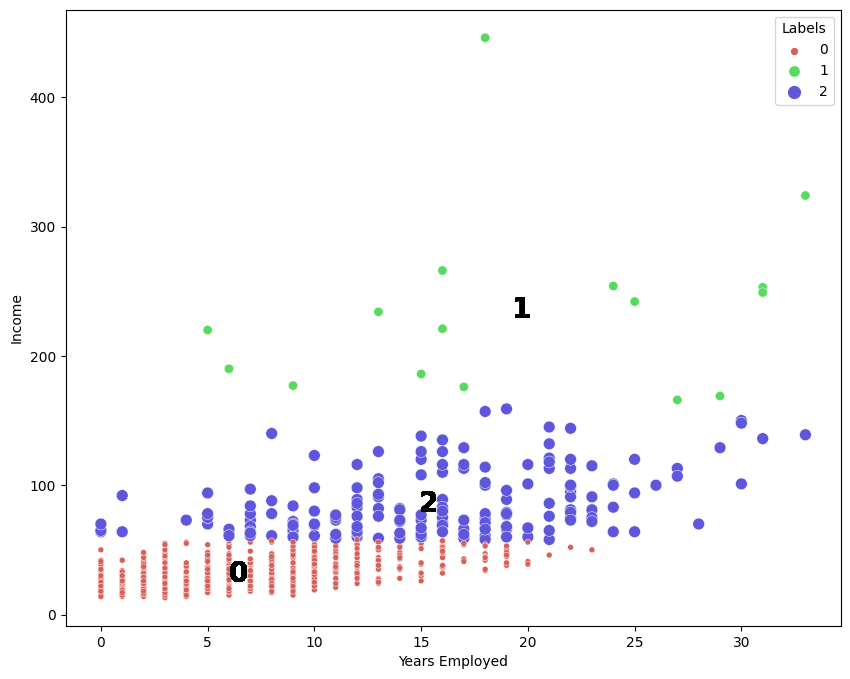

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X['Years Employed'], y=X['Income'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))
for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['Years Employed'].mean(),
                  X[X['Labels']==label]['Income'].mean()),
                  horizontalalignment = 'center', 
                  verticalalignment = 'center', 
                  size = 20, weight='bold',
                  color = 'black')

# Dari hasil di atas di dapatkan 3 label yaitu 0, 1, dan 2 yang dapat diasumsikan sebagai berikut :

 Cluster 0 adalah Nasabah Perorangan: Ini adalah individu yang membuka rekening bank untuk keperluan pribadi. Mereka dapat menggunakan rekening tersebut untuk menyimpan uang, mengakses layanan perbankan elektronik, memperoleh pinjaman, dan lain sebagainya.

 Cluster 1 adalah Nasabah Prioritas : Ini adalah nasabah perorangan atau bisnis yang memiliki aset yang cukup besar dan memenuhi persyaratan tertentu yang ditetapkan oleh bank. Nasabah prioritas biasanya menikmati layanan perbankan yang lebih tinggi, seperti manajer hubungan pribadi, akses ke program investasi eksklusif, dan layanan perbankan yang disesuaikan.


 Cluster 2 adalah Nasabah Bisnis: Ini adalah entitas bisnis seperti perusahaan, firma, atau organisasi nirlaba yang membuka rekening bank untuk keperluan bisnis mereka. Mereka dapat melakukan transaksi perbankan seperti pembayaran gaji, menerima pembayaran dari pelanggan, meminjam uang untuk modal usaha, dan lain sebagainya.

In [10]:
print(X)

     Age  Years Employed  Income  Labels
0     41               6      19       0
1     47              26     100       2
2     33              10      57       0
3     29               4      19       0
4     47              31     253       1
..   ...             ...     ...     ...
845   27               5      26       0
846   28               7      34       0
847   25               0      18       0
848   32              12      28       0
849   52              16      64       2

[850 rows x 4 columns]


In [11]:
X.to_excel("output_clusterss.xlsx")

# save model

In [ ]:
import pickle
pickle.dump(kmean, open('Clustering_customer.sav','wb'))